In [42]:
import numpy as np
import pandas as pd
import re
from datetime import datetime

In [43]:
f = open("WhatsApp Chat with Kanishka/WhatsApp Chat with Kanishka.txt",'r', encoding='utf-8')

In [44]:
data = f.read()

In [45]:
# Define pattern for timestamps
pattern = r"(\d{1,2}/\d{1,2}/\d{4}), (\d{1,2}:\d{2}) - (.+)"

In [46]:
# data_lines = data.split("\n")  # Split by lines
# print("Total lines in file:", len(data_lines))


In [47]:
# Extract all matches
matches = re.findall(pattern, data)

In [48]:
# Lists to store extracted data
datetimes = []
users = []
messages = []


for match in matches:
    date_part, time_part, msg = match  # Unpacking the tuple
    
    # Split user and message
    split_msg = msg.split(": ", 1)  # Splitting on first ': ' to separate user and message
    if len(split_msg) == 2:
        user, message = split_msg
    else:
        user = "Unknown"  # Handle system messages
        message = split_msg[0]

    #  **Filter out system messages**
    if "Messages and calls are end-to-end encrypted" in message:
        continue  # Skip encryption messages

    # Correct datetime conversion
    formatted_datetime = datetime.strptime(f"{date_part} {time_part}", "%d/%m/%Y %H:%M")

    # Append to lists
    datetimes.append(formatted_datetime)
    users.append(user)
    messages.append(message)


In [49]:
chat_df = pd.DataFrame({
    "datetime": datetimes,  
    "user": users,          
    "message": messages     
})


In [50]:
print(chat_df.head(10))  


             datetime      user  \
0 2024-04-27 19:30:00   Unknown   
1 2024-04-27 19:30:00  Kanishka   
2 2024-04-27 19:30:00  Kanishka   
3 2024-04-27 19:30:00         .   
4 2024-04-27 19:31:00         .   
5 2024-04-27 19:31:00  Kanishka   
6 2024-04-27 19:33:00  Kanishka   
7 2024-04-27 19:33:00  Kanishka   
8 2024-04-27 19:36:00         .   
9 2024-04-27 19:36:00  Kanishka   

                                             message  
0                              Kanishka is a contact  
1  Maine vo img delete krdi thi phn se send it again  
2                  Talking about this jispe tag kiya  
3                                               ruko  
4                                    <Media omitted>  
5                                       Ok dekhti hu  
6                     Poora question sirf yehi h kya  
7                                      No statement?  
8                                      ruko bhej rha  
9                                                okk  


In [51]:
chat_df.head()

,datetime,user,message
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya
3,2024-04-27 19:30:00,.,ruko
4,2024-04-27 19:31:00,.,<Media omitted>


In [52]:
chat_df['user'] = chat_df['user'].replace('.', 'PK')


In [53]:
chat_df.head(10)

,datetime,user,message
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya
3,2024-04-27 19:30:00,PK,ruko
4,2024-04-27 19:31:00,PK,<Media omitted>
5,2024-04-27 19:31:00,Kanishka,Ok dekhti hu
6,2024-04-27 19:33:00,Kanishka,Poora question sirf yehi h kya
7,2024-04-27 19:33:00,Kanishka,No statement?
8,2024-04-27 19:36:00,PK,ruko bhej rha
9,2024-04-27 19:36:00,Kanishka,okk


In [54]:
chat_df.shape

(37964, 3)

In [55]:
chat_df['year'] = chat_df['datetime'].dt.year

In [56]:
chat_df['month'] = chat_df['datetime'].dt.month_name()

In [57]:
chat_df['day'] = chat_df['datetime'].dt.day

In [58]:
chat_df['hours'] = chat_df['datetime'].dt.hour

In [59]:
chat_df['minute'] = chat_df['datetime'].dt.minute

In [60]:
chat_df.head()

,datetime,user,message,year,month,day,hours,minute
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact,2024,April,27,19,30
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again,2024,April,27,19,30
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya,2024,April,27,19,30
3,2024-04-27 19:30:00,PK,ruko,2024,April,27,19,30
4,2024-04-27 19:31:00,PK,<Media omitted>,2024,April,27,19,31


In [63]:
from urlextract import URLExtract
extractor = URLExtract()
links = []

for message in chat_df['message']:
    links.extend(extractor.find_urls(message))


In [ ]:
# !pip install urlextract

In [64]:
links

['https://www.youtube.com/watch?v=m5iGcEWi8L4',
 'https://seek.onlinedegree.iitm.ac.in/courses/ns_24t2_cs2008p?id=9&type=lesson&tab=courses&unitId=5',
 'that.In',
 'https://youtu.be/iw0WcBNUtro?feature=shared',
 'https://github.com/sachin3098/MLP-project-Last-term/blob/main/Code/colab%20notebook.ipynb',
 'https://colab.research.google.com/drive/1VHcPMg9RaAAFKJewxZ16NSm41iwDvFWV?usp=drive_link',
 'https://colab.research.google.com/drive/1n9w2hlEAy3EcdJjMQd_DB4ngCZPI9x3P?usp=drive_link',
 'https://www.kaggle.com/code/mmanasdora/21f1000406-notebook-t22024',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRF2AO6l_B1jI0bKx1qRMMzi9mFnM8uYkb3LIt0urvTQ6iUweEmkXwAzAKJGvXCcLoQ8XXTgPnFoT0L/pubhtml?gid=0&single=true',
 'https://docs.google.com/spreadsheets/u/0/d/e/2PACX-1vTCy8keGv4ZmIw1KzODkqu0gEyBBZVMh6TI3T80ymnaexAg8C7_775Cg0fggFDuPODvfZpLiOBnFIYw/pubhtml?gid=0&single=true',
 'https://mlp-viva-workflow-z5snvc5h3q-el.a.run.app/student/',
 'https://docs.google.com/spreadsheets/d/1TpmHPHDkyTSjIH

In [65]:
len(links)

99

In [69]:
x = chat_df['user'].value_counts().head()

In [70]:
 import matplotlib.pyplot as plt

In [71]:
name = x.index
count = x.values

<BarContainer object of 3 artists>

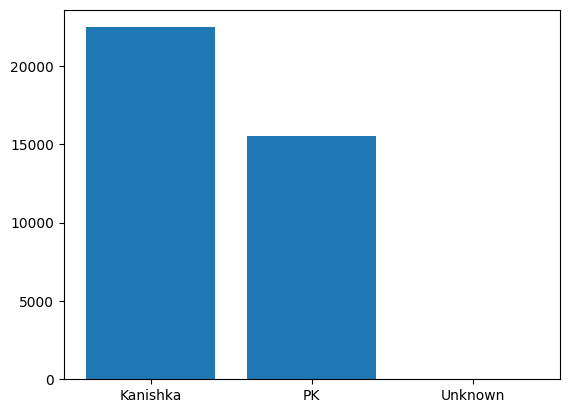

In [73]:
plt.bar(name,count)